<a href="https://colab.research.google.com/github/MoonlightO2/Flight-Data-Analysis/blob/main/Flight_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Data Analysis**
This is an outline and sample code for a Python project that performs data analysis on flight data with the columns you specified. This project will include data loading, exploratory data analysis (EDA), basic visualization, and delay analysis.

Project Outline

1. Data Loading & Preprocessing
- Load the dataset.
- Handle missing values, if any.
- Convert data types as necessary (e.g., converting dates).

2. Exploratory Data Analysis (EDA)
- Summary statistics.
- Check the distribution of key variables (e.g., `Day of Month`, `Day of Week`, `Departure delay`, `Arrival delay`).

3. Delay Analysis
- Analyze and visualize departure and arrival delays.
- Identify trends (e.g., delays by day of the week, by carrier, by origin/destination airport).

4. Visualization
- Plot distribution of delays.
- Plot delays by carrier and day of the week.
- Compare delays for different airports.

5. Reporting & Insights
- Summarize key insights in a final report.

***Dataset***: https://www.kaggle.com/datasets/tylerx/flights-and-airports-data

In [94]:
# @title Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
file1 = '/content/drive/MyDrive/Projects/Portfolio/Flight data/Dataset 2/All Flight data.csv'
file2 = '/content/drive/MyDrive/Projects/Portfolio/Flight data/Dataset 2/All Flight data Processed.csv'

In [96]:
# @title Step 2: Load the dataset
df = pd.read_csv(file1)
print('Shape: ', df.shape, '\n')
print('Columns: ', df.columns.tolist(), '\n')

Shape:  (2673185, 13) 

Columns:  ['Day of Month', 'Day of Week', 'Original Airport ID', 'Original City', 'Original State', 'Original Airport Name', 'Destination Airport ID', 'Destination City', 'Destination State', 'Destination Airport Name', 'Carrier', 'Departure delay', 'Arrival delay'] 



In [97]:
# @title Step 3: Data Preprocessing
# Display the first few rows
df.head()

,Day of Month,Day of Week,Original Airport ID,Original City,Original State,Original Airport Name,Destination Airport ID,Destination City,Destination State,Destination Airport Name,Carrier,Departure delay,Arrival delay
0,16,Monday,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,US,6.0,36.0
1,17,Tuesday,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,US,13.0,40.0
2,20,Friday,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,US,15.0,44.0
3,18,Wednesday,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,US,-2.0,2.0
4,19,Thursday,10299,Anchorage,AK,Ted Stevens Anchorage International,14107,Phoenix,AZ,Phoenix Sky Harbor International,US,3.0,25.0


In [98]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for 'Departure delay' and 'Arrival delay' without using inplace=True
df['Departure delay'] = df['Departure delay'].fillna(df['Departure delay'].mean())
df['Arrival delay'] = df['Arrival delay'].fillna(df['Arrival delay'].mean())

# Convert date-related columns if necessary
# Example: Convert 'Day of Month' and 'Day of Week' to categorical
df['Day of Month'] = df['Day of Month'].astype('category')
df['Day of Week'] = df['Day of Week'].astype('category')

Day of Month                0
Day of Week                 0
Original Airport ID         0
Original City               0
Original State              0
Original Airport Name       0
Destination Airport ID      0
Destination City            0
Destination State           0
Destination Airport Name    0
Carrier                     0
Departure delay             0
Arrival delay               0
dtype: int64


### **Exploratory Data Analysis (EDA)**

In [99]:
# @title Step 4: Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

       Original Airport ID  Destination Airport ID  Departure delay  \
count         2.673185e+06            2.673185e+06     2.673185e+06   
mean          1.274287e+04            1.274232e+04     1.059421e+01   
std           1.502744e+03            1.502671e+03     3.613174e+01   
min           1.014000e+04            1.014000e+04    -6.300000e+01   
25%           1.129200e+04            1.129200e+04    -4.000000e+00   
50%           1.289200e+04            1.289200e+04    -1.000000e+00   
75%           1.405700e+04            1.405700e+04     1.000000e+01   
max           1.537600e+04            1.537600e+04     1.863000e+03   

       Arrival delay  
count   2.673185e+06  
mean    6.727290e+00  
std     3.875007e+01  
min    -9.400000e+01  
25%    -1.100000e+01  
50%    -3.000000e+00  
75%     1.000000e+01  
max     1.845000e+03  


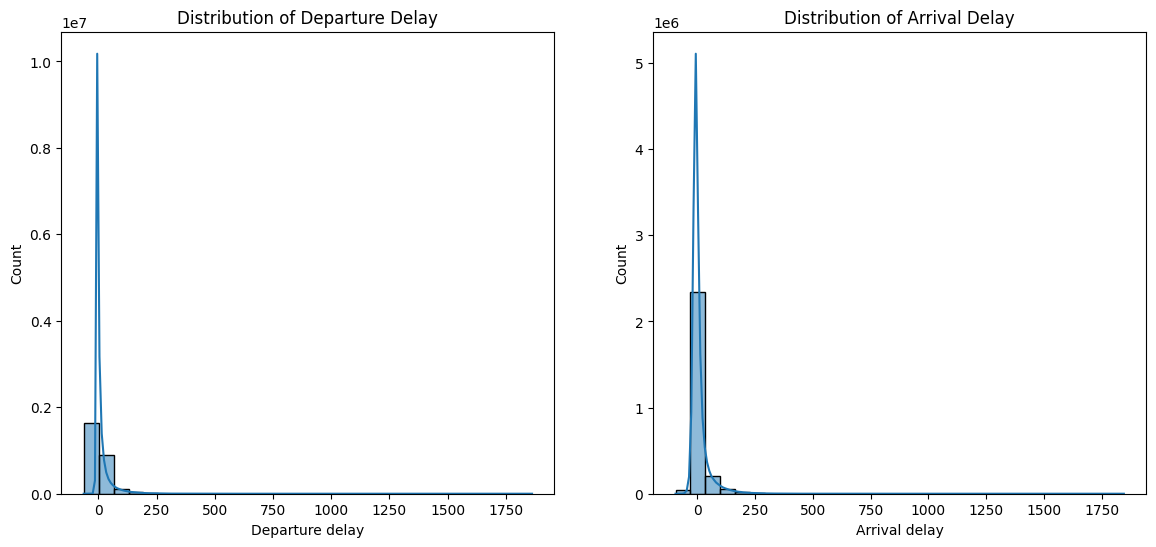

In [100]:
# Distribution of departure and arrival delays
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Departure delay'], bins=30, kde=True)
plt.title('Distribution of Departure Delay')
plt.subplot(1, 2, 2)
sns.histplot(df['Arrival delay'], bins=30, kde=True)
plt.title('Distribution of Arrival Delay')
plt.show()

In [101]:
# Group by 'Day of Week' and calculate mean delay times, with observed=True to remove the warning
avg_delay_by_day = df.groupby('Day of Week', observed=True)[['Departure delay', 'Arrival delay']].mean()
print(avg_delay_by_day)

             Departure delay  Arrival delay
Day of Week                                
Friday              7.484242       2.156380
Monday              8.691986       4.431672
Saturday            9.660870       5.286377
Sunday             10.933413       7.138029
Thursday           12.408376       8.793206
Tuesday            10.479050       7.311428
Wednesday          13.775892      10.904684


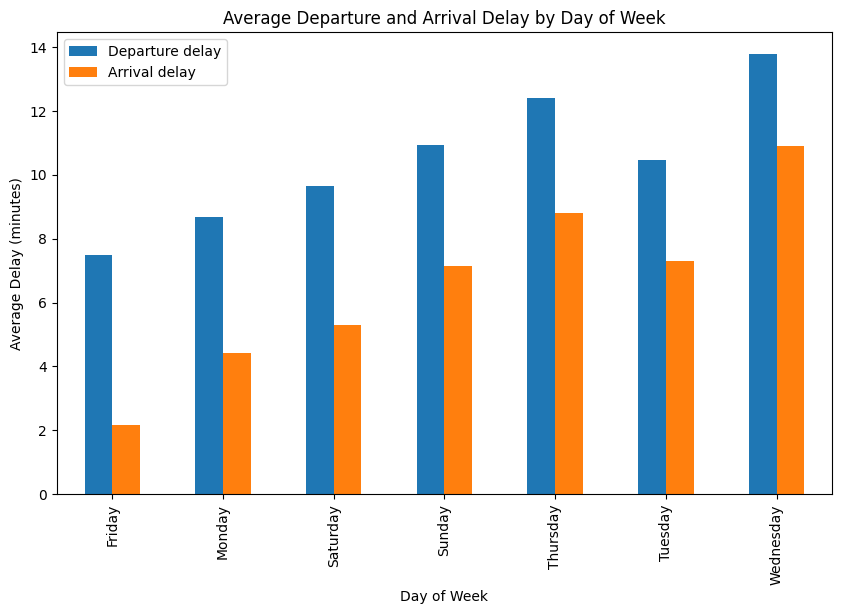

In [102]:
# Plot the average delays by day of the week
avg_delay_by_day.plot(kind='bar', figsize=(10, 6))
plt.title('Average Departure and Arrival Delay by Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.show()

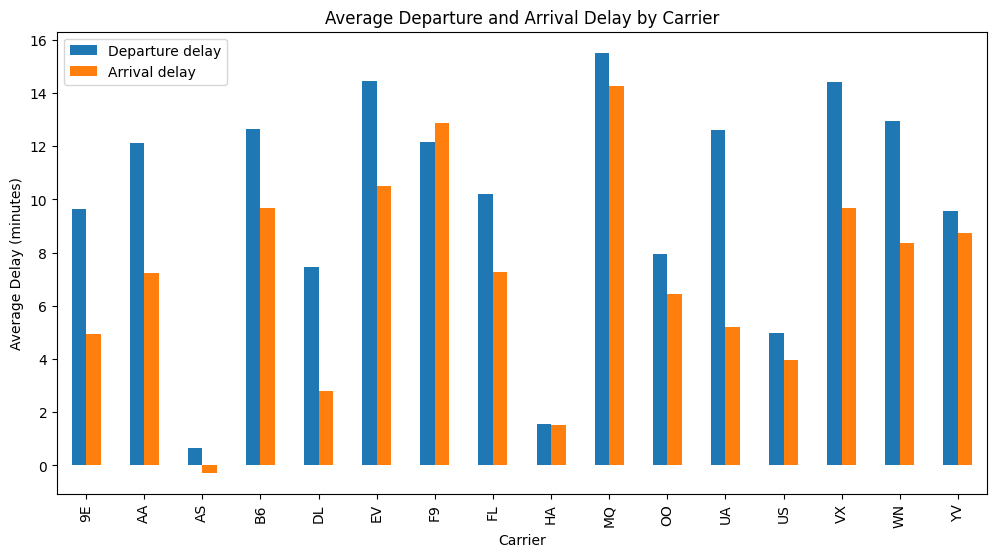

In [103]:
# Delay by Carrier
carrier_delay = df.groupby('Carrier')[['Departure delay', 'Arrival delay']].mean()
carrier_delay.plot(kind='bar', figsize=(12, 6))
plt.title('Average Departure and Arrival Delay by Carrier')
plt.ylabel('Average Delay (minutes)')
plt.show()

In [104]:
# @title Step 6: Insights on Origin/Destination Airports
# Delay by Origin Airport
origin_delay = df.groupby('Original Airport ID')[['Departure delay', 'Arrival delay']].mean().sort_values(by='Departure delay', ascending=False)
print(origin_delay.head())

                     Departure delay  Arrival delay
Original Airport ID                                
14771                      18.753361      13.531881
11618                      17.839315      12.391264
12953                      15.000882      11.459215
13930                      14.277704       9.978761
13851                      13.399038      10.615177


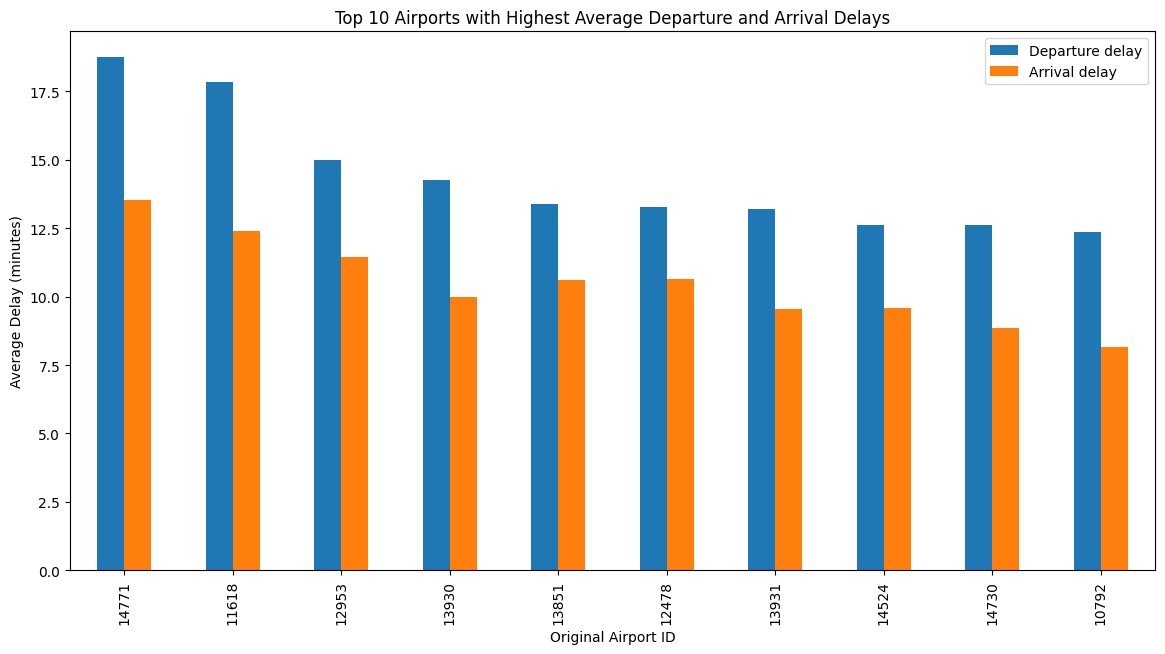

In [105]:
# Plot delays for top origin airports with highest delays
top_origin_delay = origin_delay.head(10)
top_origin_delay.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Airports with Highest Average Departure and Arrival Delays')
plt.ylabel('Average Delay (minutes)')
plt.show()

In [106]:
# @title Step 7: Summarize findings
# Save the processed data and EDA results to a CSV or Excel file if needed
df.to_csv(file2, index=False)

### **1. Insight: Days with Highest Average Delays**
Identify the day of the week with the highest average delays (both departure and arrival).

In [107]:
# Identify the day of the week with the highest average departure and arrival delays
highest_avg_delay_day = avg_delay_by_day.idxmax()
print("Day with highest average departure delay:", highest_avg_delay_day['Departure delay'])
print("Day with highest average arrival delay:", highest_avg_delay_day['Arrival delay'])

Day with highest average departure delay: Wednesday
Day with highest average arrival delay: Wednesday


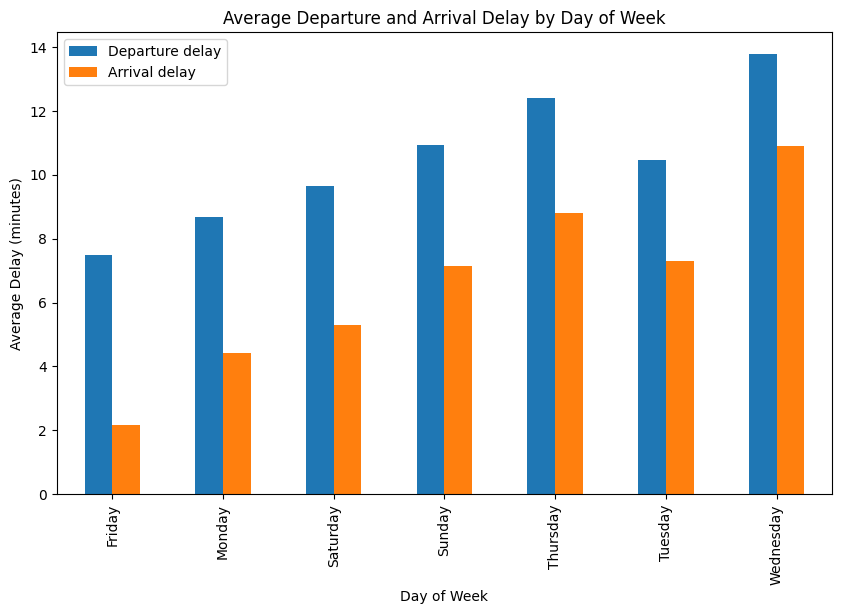

In [108]:
# Visualize the average delays by day of the week
avg_delay_by_day.plot(kind='bar', figsize=(10, 6))
plt.title('Average Departure and Arrival Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.show()

### **2. Insight: Carrier with the Highest Average Delays**
Find the carrier (airline) with the highest average departure and arrival delays.

In [109]:
# Group by 'Carrier' to find average delays
carrier_delay = df.groupby('Carrier')[['Departure delay', 'Arrival delay']].mean()

# Identify the carrier with the highest average departure and arrival delays
highest_delay_carrier = carrier_delay.idxmax()
print("Carrier with highest average departure delay:", highest_delay_carrier['Departure delay'])
print("Carrier with highest average arrival delay:", highest_delay_carrier['Arrival delay'])

Carrier with highest average departure delay: MQ
Carrier with highest average arrival delay: MQ


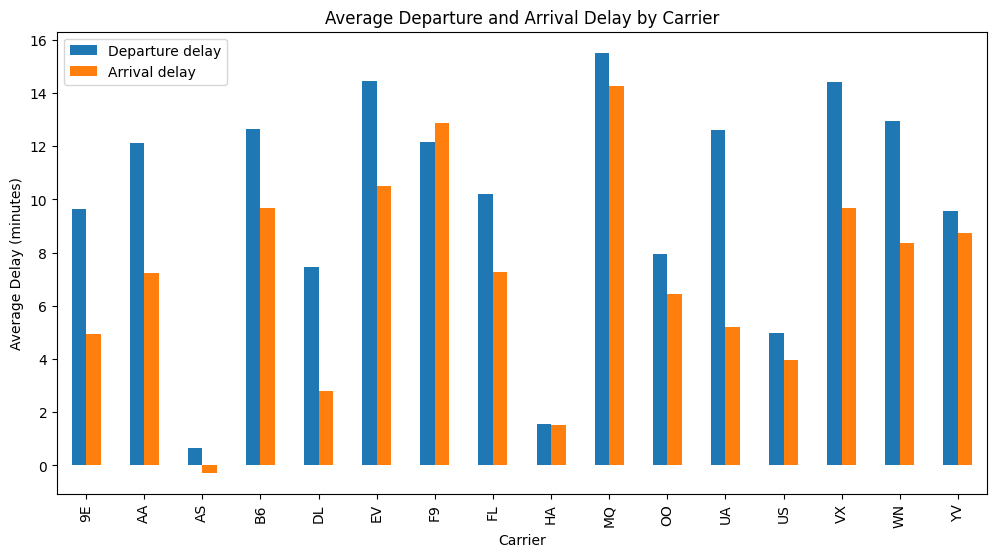

In [110]:
# Visualize the average delays by carrier
carrier_delay.plot(kind='bar', figsize=(12, 6))
plt.title('Average Departure and Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay (minutes)')
plt.show()

### **3. Insight: Airports with Highest Departure Delays**
Find the top 10 origin airports with the highest average departure delay.

In [111]:
# Group by 'Original Airport ID' to find average departure delays
origin_airport_delay = df.groupby('Original Airport ID')['Departure delay'].mean().sort_values(ascending=False)

# Get the top 10 airports with highest average departure delay
top_10_origin_airports = origin_airport_delay.head(10)
print("Top 10 Airports with Highest Average Departure Delay:\n", top_10_origin_airports)

Top 10 Airports with Highest Average Departure Delay:
 Original Airport ID
14771    18.753361
11618    17.839315
12953    15.000882
13930    14.277704
13851    13.399038
12478    13.281752
13931    13.214922
14524    12.631951
14730    12.607423
10792    12.366152
Name: Departure delay, dtype: float64


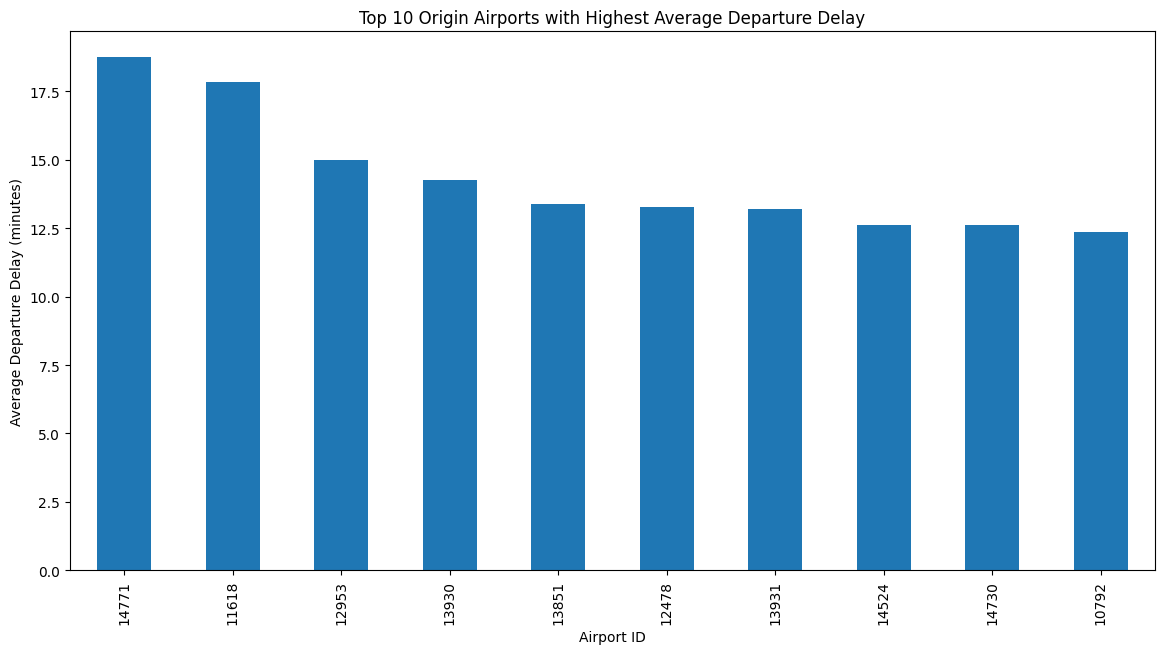

In [112]:
# Visualize the delays for these top 10 origin airports
top_10_origin_airports.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Origin Airports with Highest Average Departure Delay')
plt.xlabel('Airport ID')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

### **4. Insight: Average Delays by City**
Find average delays by the origin city to see if there are cities with significantly higher delays.

In [113]:
# Group by 'Original City' to find average delays
city_delay = df.groupby('Original City')[['Departure delay', 'Arrival delay']].mean()

# Sort by departure delay to identify cities with high average delays
city_delay_sorted = city_delay.sort_values(by='Departure delay', ascending=False)
print("Cities with highest average delays:\n", city_delay_sorted.head(10))

Cities with highest average delays:
                Departure delay  Arrival delay
Original City                                
San Francisco        18.753361      13.531881
Newark               17.839315      12.391264
New York             14.111991      11.034986
Chicago              13.492060       9.322353
Oklahoma City        13.399038      10.615177
Norfolk              13.214922       9.563677
Richmond             12.631951       9.600353
Louisville           12.607423       8.866864
Buffalo              12.366152       8.165277
Providence           12.297797       8.961331


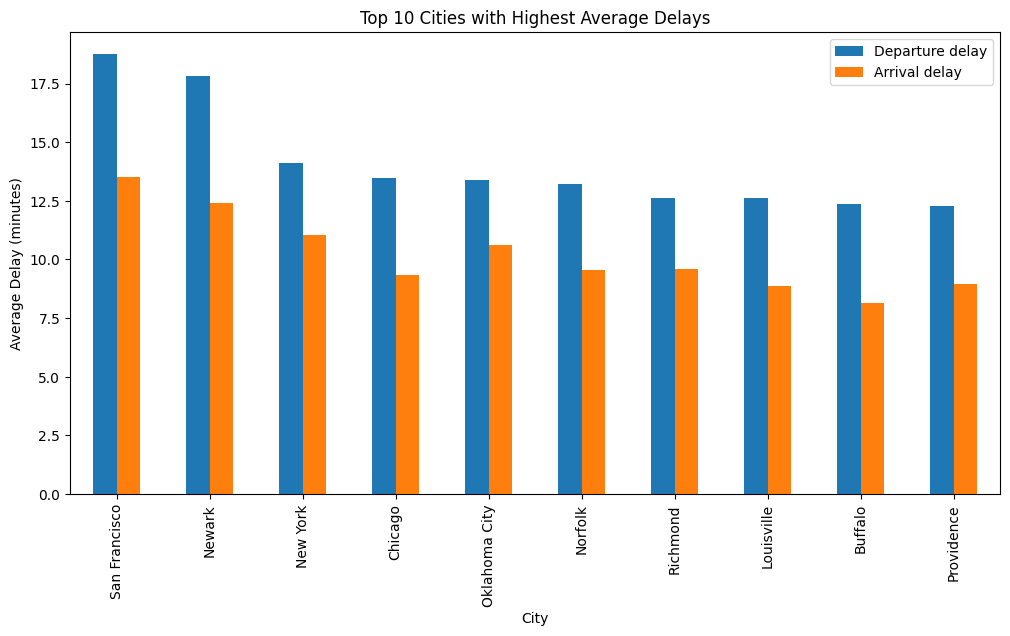

In [114]:
# Visualize the average delays by city
city_delay_sorted.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Cities with Highest Average Delays')
plt.xlabel('City')
plt.ylabel('Average Delay (minutes)')
plt.show()

## **5. Insight: Day of the Month with Highest Delays**
Analyze the day of the month to identify if any specific days have unusually high delays, possibly due to seasonal or operational patterns.

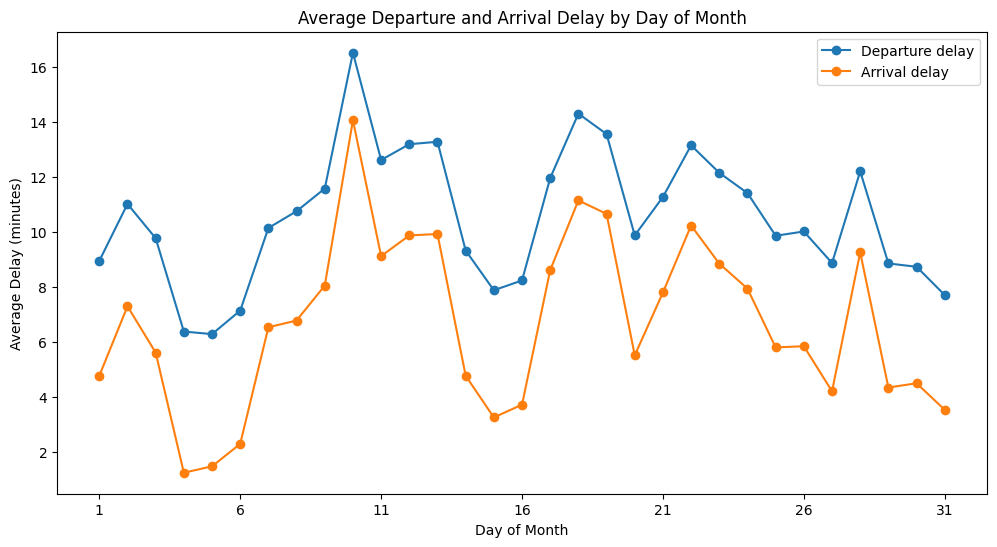

In [115]:
# Group by 'Day of Month' to calculate average delays, with observed=True to remove the warning
day_of_month_delay = df.groupby('Day of Month', observed=True)[['Departure delay', 'Arrival delay']].mean()

# Visualize the average delays by day of the month
day_of_month_delay.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Average Departure and Arrival Delay by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Delay (minutes)')
plt.show()

### **6. Insight: Comparison Between Origin and Destination Delays**
Compare average delays between origin and destination airports to see if delays are more frequent at specific locations.

In [116]:
# Group by 'Original Airport ID' and 'Destination Airport ID' to get average delays
origin_dest_delay = df.groupby(['Original Airport ID', 'Destination Airport ID'])[['Departure delay', 'Arrival delay']].mean()

# Display the top 10 routes with the highest departure delays
top_delay_routes = origin_dest_delay.sort_values(by='Departure delay', ascending=False).head(10)
print("Top 10 routes with the highest departure delays:\n", top_delay_routes)

Top 10 routes with the highest departure delays:
                                             Departure delay  Arrival delay
Original Airport ID Destination Airport ID                                
14524               14122                        166.000000     145.000000
14492               14122                         55.000000      63.000000
13871               12892                         54.000000      60.000000
11042               11193                         42.909091      44.454545
13303               14747                         37.948113      21.698113
13891               13232                         32.956311      23.029126
14524               11697                         32.638191      31.045226
10721               13796                         32.337500      35.375000
14771               13232                         31.992832      23.025090
13487               13931                         31.985612      21.640288


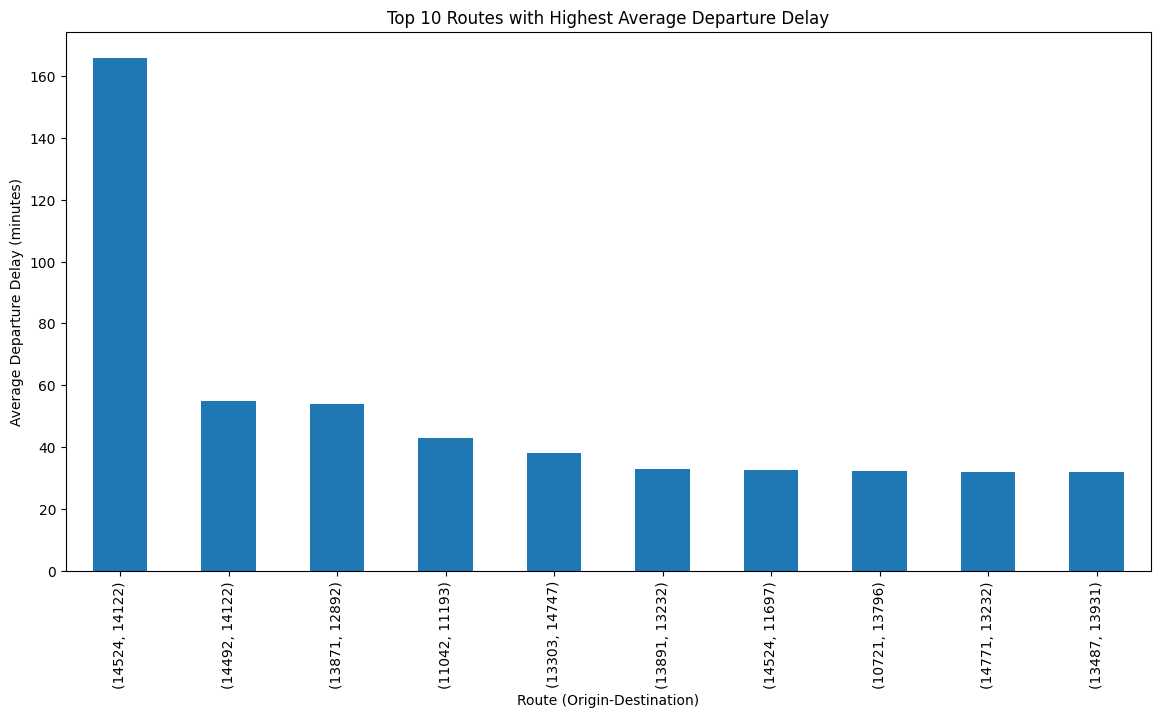

In [117]:
# Visualize top 10 routes with highest departure delays
top_delay_routes['Departure delay'].plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Routes with Highest Average Departure Delay')
plt.xlabel('Route (Origin-Destination)')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

### **Explanation of Key Steps**

- Data Loading & Preprocessing: Handles missing values and ensures columns have appropriate data types.
- EDA: Summarizes data distributions and gives an initial overview of delay times.
- Delay Analysis: Finds patterns in delays by examining the day of the week, carrier, and airport data.
- Visualization: Uses Seaborn and Matplotlib to illustrate insights, making it easier to identify trends.
- Reporting & Insights: Summarizes findings and can export processed data for further reporting.

This setup provides a structured way to analyze flight delays and identify patterns across different factors like day, airport, and carrier.

Each of these code snippets provides insights into different aspects of flight delay data, such as which days, carriers, cities, or airports are most associated with delays. The visualizations will help you see trends and make the insights more intuitive.